In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)         

# Importing Data

In [3]:
# Importing Airline Flight Delay and Cancellation Data, August 2019 - August 2023.df
# US Department of Transportation, Bureau of Transportation Statistics: https://www.transtats.bts.gov
df = pd.read_csv(r'C:\Data\flight_data\delay_cancel_2019_2023\flights_sample_3m.csv')
# Source: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023 

In [4]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# view all column names
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [6]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [7]:
# Checking size of df
df.shape

(3000000, 32)

In [8]:
# Converting to date format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

Getting feel for data by checking number of flights per day

In [9]:
flights_per_day = df.groupby('FL_DATE')['FL_NUMBER'].count().copy()
print(flights_per_day)

FL_DATE
2019-01-01    1844
2019-01-02    2042
2019-01-03    2025
2019-01-04    2016
2019-01-05    1724
              ... 
2023-08-27    2047
2023-08-28    2028
2023-08-29    1901
2023-08-30    1897
2023-08-31    1988
Name: FL_NUMBER, Length: 1704, dtype: int64


In [10]:
flights_per_day.describe()

count    1704.000000
mean     1760.563380
std       394.202464
min       521.000000
25%      1606.250000
50%      1892.000000
75%      2017.250000
max      2379.000000
Name: FL_NUMBER, dtype: float64

# Data Cleaning and Consistency Checks

Mixed data

In [11]:
# Check for mixed data types
for column in df.columns:
    if df[column].apply(type).nunique() > 1:
        print(f"Column '{column}' has mixed data types.")

Column 'CANCELLATION_CODE' has mixed data types.


In [12]:
# See which values correspond to which data types
df.groupby(df['CANCELLATION_CODE'].apply(type), sort=False)['CANCELLATION_CODE'].unique()

CANCELLATION_CODE
<class 'float'>           [nan]
<class 'str'>      [D, B, A, C]
Name: CANCELLATION_CODE, dtype: object

In [13]:
# convert all to string
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('string')

Missings

In [14]:
print(df.isnull().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [15]:
# Check counts of cancellation - this is likely to inform missings
df['CANCELLED'].value_counts()

CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64

the # cancellation code missings corresponds to # of flights that weren't cancelled

In [16]:
# Looking into rows that weren't cancelled but missing departure and arrival time info
# df with only non-cancelled flights
flown = df[df['CANCELLED']==0].copy()

In [17]:
print(flown.isnull().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                      804
TAXI_IN                        804
CRS_ARR_TIME                     0
ARR_TIME                       802
ARR_DELAY                     7058
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                  7058
AIR_TIME                      7058
DISTANCE                         0
DELAY_DUE_CARRIER          2386997
DELAY_DUE_WEATHER   

7058 rows were flights that weren't cancelled, yet are missing data on elapsed time and arr_delay. Checking if this is due to diversions

In [18]:
flown['DIVERTED'].value_counts()

DIVERTED
0.0    2913804
1.0       7056
Name: count, dtype: int64

Yes all but 2 were diverted flights. Looking at them

In [19]:
div2 = flown[(flown['ARR_DELAY'].isnull()) & (flown['DIVERTED'] == 0)]
div2.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
918330,2023-05-21,Republic Airline,Republic Airline: YX,YX,20452,5612,LGA,"New York, NY",BNA,"Nashville, TN",1605,1642.0,37.0,36.0,1718.0,NaN,NaN,1746,NaN,NaN,0.0,<NA>,0.0,161.0,NaN,NaN,764.0,NaN,NaN,NaN,NaN,NaN
1302862,2022-12-21,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,777,DEN,"Denver, CO",LAS,"Las Vegas, NV",1956,1951.0,-5.0,81.0,2112.0,NaN,NaN,2100,NaN,NaN,0.0,<NA>,0.0,124.0,NaN,NaN,628.0,NaN,NaN,NaN,NaN,NaN


No clear what happened here, seems like error in recording the arrival information. Upon googling it I can't find any further information so deleting these 2 cases

In [20]:
# dropping these 2 cases that weren't cancelled or diverted but misisng arrival data
df = df[~(df['ARR_DELAY'].isnull() & (df['DIVERTED'] == 0) & (df['CANCELLED'] == 0))]
df.shape

(2999998, 32)

In [21]:
# Seeing if any other missings for flights not cancelled or diverted
miss_subset = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]
missing_counts = miss_subset.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
print(missing_counts)

CANCELLATION_CODE          2913802
DELAY_DUE_CARRIER          2379939
DELAY_DUE_WEATHER          2379939
DELAY_DUE_NAS              2379939
DELAY_DUE_SECURITY         2379939
DELAY_DUE_LATE_AIRCRAFT    2379939
dtype: int64


There's reason for these to be missing

Duplicates

In [22]:
df_dups = df[df.duplicated()]
print(df_dups)     # no duplicates


Empty DataFrame
Columns: [FL_DATE, AIRLINE, AIRLINE_DOT, AIRLINE_CODE, DOT_CODE, FL_NUMBER, ORIGIN, ORIGIN_CITY, DEST, DEST_CITY, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT]
Index: []


Recoding Values

In [23]:
# Recoding values of cancellation code to informative names (table here https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr )
cancel_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National_air_system',
    'D': 'Security'
}

df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].map(cancel_map)

In [24]:
df['AIRLINE'].value_counts()

AIRLINE
Southwest Airlines Co.                576470
Delta Air Lines Inc.                  395239
American Airlines Inc.                383106
SkyWest Airlines Inc.                 343737
United Air Lines Inc.                 254504
Republic Airline                      143106
Envoy Air                             121256
JetBlue Airways                       112844
Endeavor Air Inc.                     112463
PSA Airlines Inc.                     107050
Alaska Airlines Inc.                  100467
Spirit Air Lines                       95711
Mesa Airlines Inc.                     65012
Frontier Airlines Inc.                 64465
Allegiant Air                          52738
Hawaiian Airlines Inc.                 32114
Horizon Air                            20634
ExpressJet Airlines LLC d/b/a aha!     19082
Name: count, dtype: int64

In [25]:
# Renaming values as too long. Can just keep first word
df['AIRLINE'] = df['AIRLINE'].str.split().str[0]
df['AIRLINE'].value_counts()


AIRLINE
Southwest     576470
Delta         395239
American      383106
SkyWest       343737
United        254504
Republic      143106
Envoy         121256
JetBlue       112844
Endeavor      112463
PSA           107050
Alaska        100467
Spirit         95711
Mesa           65012
Frontier       64465
Allegiant      52738
Hawaiian       32114
Horizon        20634
ExpressJet     19082
Name: count, dtype: int64

In [26]:
# Clear gap between top 5 and rest of airlines in terms of scale so marking them
top5_airlines = df['AIRLINE'].value_counts().head(5).index
df['top5_airline'] = 0
df.loc[df['AIRLINE'].isin(top5_airlines), 'top5_airline'] = 1

In [27]:
df[['AIRLINE', 'top5_airline']].head(20)

,AIRLINE,top5_airline
0,United,1
1,Delta,1
2,United,1
3,Delta,1
4,Spirit,0
5,Southwest,1
6,American,1
7,Republic,0
8,Spirit,0
9,Alaska,0


In [28]:
# Deriving Date variables for analyses
df['Month'] = df[ "FL_DATE"].dt.month
df['Day_of_week'] = df[ "FL_DATE"].dt.day_name()
df['Year'] = df[ "FL_DATE"].dt.year

df[['FL_DATE', 'Month', 'Day_of_week', 'Year']].head(10)

,FL_DATE,Month,Day_of_week,Year
0,2019-01-09,1,Wednesday,2019
1,2022-11-19,11,Saturday,2022
2,2022-07-22,7,Friday,2022
3,2023-03-06,3,Monday,2023
4,2020-02-23,2,Sunday,2020
5,2019-07-31,7,Wednesday,2019
6,2023-06-11,6,Sunday,2023
7,2019-07-08,7,Monday,2019
8,2023-02-12,2,Sunday,2023
9,2020-08-22,8,Saturday,2020


In [29]:
# hourly time variable
df['Hour_planned_dep'] = df['CRS_DEP_TIME'] // 100

In [30]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,top5_airline,Month,Day_of_week,Year,Hour_planned_dep
0,2019-01-09,United,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,1,1,Wednesday,2019,11
1,2022-11-19,Delta,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,1,11,Saturday,2022,21
2,2022-07-22,United,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,1,7,Friday,2022,9
3,2023-03-06,Delta,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,1,3,Monday,2023,16
4,2020-02-23,Spirit,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,0,2,Sunday,2020,18


<Axes: >

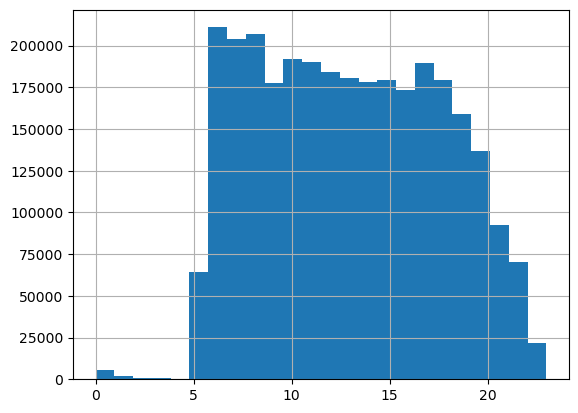

In [31]:
df['Hour_planned_dep'].hist(bins=24)

making 4 hour time bins and starting at 5am since thats when flights start

In [32]:
# function for assigning time windows
def assign_time_bin(Hour_planned_dep):
    if 5 <= Hour_planned_dep < 9:
        return '05:00–09:00'
    elif 9 <= Hour_planned_dep < 13:
        return '09:00–13:00'
    elif 13 <= Hour_planned_dep < 17:
        return '13:00–17:00'
    elif 17 <= Hour_planned_dep < 21:
        return '17:00–21:00'
    elif 21 <= Hour_planned_dep < 24:
        return '21:00–01:00'
    else:  
        return '01:00–05:00'

# Apply function to assign
df['time_bin'] = df['Hour_planned_dep'].apply(assign_time_bin)

In [33]:
# Converting to categorical
# defining order starting at 5, since that is first scheduled flights of day
time_bin_order = [
    '05:00–09:00',
    '09:00–13:00',
    '13:00–17:00',
    '17:00–21:00',
    '21:00–01:00',
    '01:00–05:00'
]

# Converting
df['time_bin'] = pd.Categorical(df['time_bin'], 
                                categories=time_bin_order, 
                                ordered=True)

In [34]:
# checking it worked
df[['FL_DATE', 'Day_of_week', 'Month', 'Year', 'CRS_DEP_TIME', 'Hour_planned_dep', 'time_bin']].head(20)

,FL_DATE,Day_of_week,Month,Year,CRS_DEP_TIME,Hour_planned_dep,time_bin
0,2019-01-09,Wednesday,1,2019,1155,11,09:00–13:00
1,2022-11-19,Saturday,11,2022,2120,21,21:00–01:00
2,2022-07-22,Friday,7,2022,954,9,09:00–13:00
3,2023-03-06,Monday,3,2023,1609,16,13:00–17:00
4,2020-02-23,Sunday,2,2020,1840,18,17:00–21:00
5,2019-07-31,Wednesday,7,2019,1010,10,09:00–13:00
6,2023-06-11,Sunday,6,2023,1010,10,09:00–13:00
7,2019-07-08,Monday,7,2019,1643,16,13:00–17:00
8,2023-02-12,Sunday,2,2023,530,5,05:00–09:00
9,2020-08-22,Saturday,8,2020,2125,21,21:00–01:00


In [35]:
# Convert day of week to ordered categorical
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Day_of_week'] = pd.Categorical(df['Day_of_week'], 
                                   categories=day_order, 
                                   ordered=True)

In [36]:
# New variables categorising delays with binary, with missings (cancelled and diverted) kept as missing
df['delay15'] = np.where(df['ARR_DELAY'].notna(), 
                         np.where(df['ARR_DELAY'] < 15, 0, 1), 
                         np.nan)
df['delay30'] = np.where(df['ARR_DELAY'].notna(), 
                         np.where(df['ARR_DELAY'] < 30, 0, 1), 
                         np.nan)
df['delay60'] = np.where(df['ARR_DELAY'].notna(), 
                         np.where(df['ARR_DELAY'] < 60, 0, 1), 
                         np.nan)

In [37]:
df[['delay30']].value_counts()

delay30
0.0        2574110
1.0         339692
Name: count, dtype: int64

In [38]:
# Check percentage of delayed flights
df[['delay30']].value_counts(normalize=True)

delay30
0.0        0.88342
1.0        0.11658
Name: proportion, dtype: float64

In [39]:
# function for assigning delay windows
def assign_delay_bin(ARR_DELAY):
    if pd.isna(ARR_DELAY):
        return np.nan
    if ARR_DELAY < 15:          # following industry standards https://www.oag.com/airline-on-time-performance-defining-late
        return 'On-time(<15m)'
    elif 15 <= ARR_DELAY < 60:
        return 'Short_delay(<1h)'
    elif 60 <= ARR_DELAY < 180:
        return 'Substantial_Delay(1-3h)'
    elif ARR_DELAY >= 180:
        return 'Major_Delay(3h+)'
    else:
        return 'Unknown'

# Apply function to assign
df['delay_type'] = df['ARR_DELAY'].apply(assign_delay_bin)

In [40]:
df['delay_type'].value_counts(dropna=False)

delay_type
On-time(<15m)              2379939
Short_delay(<1h)            355451
Substantial_Delay(1-3h)     145791
NaN                          86196
Major_Delay(3h+)             32621
Name: count, dtype: int64

Checking why so many missings

In [41]:
bincheck = df[df['delay_type'] == np.nan].copy()

In [42]:
bincheck[(bincheck['CANCELLED']!=1) & (bincheck['DIVERTED']!=1)]

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,top5_airline,Month,Day_of_week,Year,Hour_planned_dep,time_bin,delay15,delay30,delay60,delay_type


They're all cancelled or diverted flights

In [43]:
# Converting to categorical
# defining order 
delay_bin_order = [
    'On-time(<15m)',
    'Short_delay(<1h)',
    'Substantial_Delay(1-3h)',
    'Major_Delay(3h+)'
]

# Converting
df['delay_type'] = pd.Categorical(df['delay_type'], 
                                categories=delay_bin_order, 
                                ordered=True)

Deriving columns for states of departure and arrival for plotting

In [44]:
df[['ORIGIN_CITY','DEST_CITY']]

,ORIGIN_CITY,DEST_CITY
0,"Fort Lauderdale, FL","Newark, NJ"
1,"Minneapolis, MN","Seattle, WA"
2,"Denver, CO","Minneapolis, MN"
3,"Minneapolis, MN","San Francisco, CA"
4,"Orlando, FL","Dallas/Fort Worth, TX"
...,...,...
2999995,"Jacksonville, FL","Charlotte, NC"
2999996,"Chicago, IL","Austin, TX"
2999997,"Huntsville, AL","Atlanta, GA"
2999998,"Boston, MA","New York, NY"


In [45]:
df["Origin_State_Code"] = df["ORIGIN_CITY"].str.split().str[-1]
df["Destination_State_Code"] = df["DEST_CITY"].str.split().str[-1]
df[['ORIGIN_CITY', 'Origin_State_Code','DEST_CITY', 'Destination_State_Code']].head(10)

,ORIGIN_CITY,Origin_State_Code,DEST_CITY,Destination_State_Code
0,"Fort Lauderdale, FL",FL,"Newark, NJ",NJ
1,"Minneapolis, MN",MN,"Seattle, WA",WA
2,"Denver, CO",CO,"Minneapolis, MN",MN
3,"Minneapolis, MN",MN,"San Francisco, CA",CA
4,"Orlando, FL",FL,"Dallas/Fort Worth, TX",TX
5,"Dallas, TX",TX,"Oklahoma City, OK",OK
6,"Washington, DC",DC,"Boston, MA",MA
7,"Huntsville, AL",AL,"Washington, DC",DC
8,"Houston, TX",TX,"Los Angeles, CA",CA
9,"Seattle, WA",WA,"Fairbanks, AK",AK


In [46]:
df['ORIGIN_CITY'].value_counts(dropna=False)

ORIGIN_CITY
Chicago, IL              157368
Atlanta, GA              153556
Dallas/Fort Worth, TX    130334
Denver, CO               119918
New York, NY             113039
                          ...  
Watertown, NY                21
Ogden, UT                    18
Wilmington, DE               17
Florence, SC                  8
Williamsport, PA              6
Name: count, Length: 373, dtype: int64

Creating categorical distance variable

<Axes: >

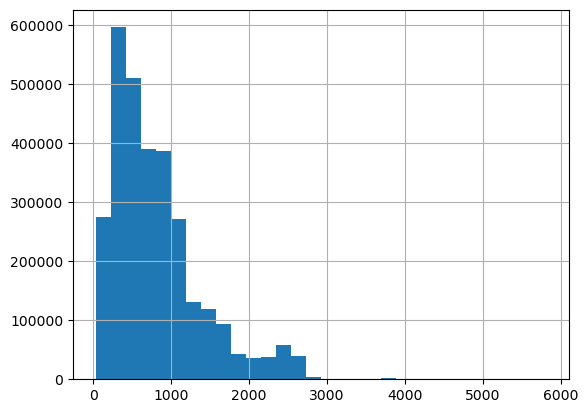

In [47]:
df['DISTANCE'].hist(bins = 30)

In [49]:
def assign_distance_bin(DISTANCE):
    if pd.isna(DISTANCE):
        return np.nan
    if DISTANCE < 1000:
        return 'Short Distance(<1000)'
    elif  1000 <= DISTANCE < 2000:
        return 'Medium Distance(1000-2000)'
    elif DISTANCE >= 2000:
        return 'Long Distance (2000+)'
    else:
        return 'Unknown'
    
# Apply function to variable
df['flight_length'] = df['DISTANCE'].apply(assign_distance_bin)
df[['flight_length', 'DISTANCE']].head()

,flight_length,DISTANCE
0,Medium Distance(1000-2000),1065.0
1,Medium Distance(1000-2000),1399.0
2,Short Distance(<1000),680.0
3,Medium Distance(1000-2000),1589.0
4,Short Distance(<1000),985.0


In [50]:
df['flight_length'].value_counts()

flight_length
Short Distance(<1000)         2170159
Medium Distance(1000-2000)     658181
Long Distance (2000+)          171658
Name: count, dtype: int64

In [51]:
# Converting to categorical
# defining order 
distance_bin_order = [
    'Short Distance(<1000)',
    'Medium Distance(1000-2000)',
    'Long Distance (2000+)'
]

# Converting
df['flight_length'] = pd.Categorical(df['flight_length'], 
                                categories=distance_bin_order, 
                                ordered=True)

In [52]:
df.isna().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79942
TAXI_IN                      79942
CRS_ARR_TIME                     0
ARR_TIME                     79940
ARR_DELAY                    86196
CANCELLED                        0
CANCELLATION_CODE          2920858
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86196
AIR_TIME                     86196
DISTANCE                         0
DELAY_DUE_CARRIER          2466135
DELAY_DUE_WEATHER   

# Exporting cleaned DF with derived variables

In [53]:
# Exporting DF
path = r'C:\Users\seank\OneDrive\Dokumente\Career Foundry Data Analytics Course\Data Immersion\6'

df.to_pickle(os.path.join(path, 'Data', 'flights_checked.csv'))

In [51]:
df.shape

(2999998, 45)